In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
# 因为电影和用户太多，不便于计算，挑出打分多的用户和打分多的电影

In [3]:
ratings = pd.read_csv("C:\\share\\data\\ml-1m\\ratings.dat",
                      sep="::",
                      header=None,
                      engine='python',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
ratings.dropna(axis=0, inplace=True)
print(ratings.shape)
ratings[:10]

(1000209, 4)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [4]:
# 初始状态下，有6000个用户和3700个电影
ratings['UserID'].drop_duplicates().size,ratings['MovieID'].drop_duplicates().size,

(6040, 3706)

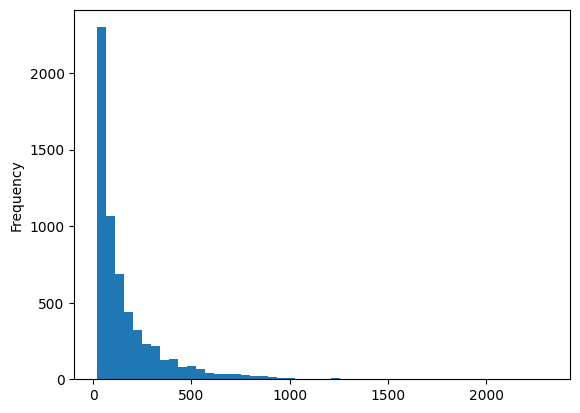

In [5]:
# 按照打分数量
user_rating_count = ratings.groupby(by="UserID").count()['Rating']
user_rating_count.plot.hist(bins=50)
plt.show()

In [6]:
user_rating_count.sort_values()
# 大多数用户打分都很少

UserID
947       20
4068      20
2530      20
341       20
5258      20
        ... 
1181    1521
1941    1595
4277    1743
1680    1850
4169    2314
Name: Rating, Length: 6040, dtype: int64

In [7]:
for thres in [50, 100, 200, 500, 1000]:
    print(thres, user_rating_count[user_rating_count >thres].count())
# 只有大概400个用户给500个电影打过分，因此再看一下电影被打分的情况

50 4247
100 2909
200 1578
500 396
1000 40


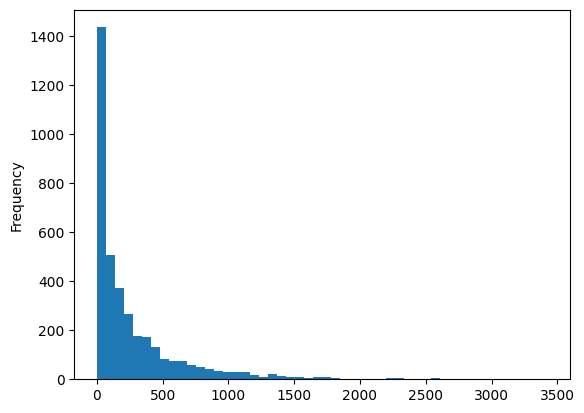

In [8]:
movie_rating_count = ratings.groupby(by="MovieID").count()['Rating']
movie_rating_count.plot.hist(bins=50)
plt.show()

In [9]:
movie_rating_count.sort_values()
# 存在一些电影只有一次打分

MovieID
402        1
2214       1
3382       1
2217       1
2218       1
        ... 
480     2672
1210    2883
1196    2990
260     2991
2858    3428
Name: Rating, Length: 3706, dtype: int64

In [10]:
for thres in [50, 100, 200, 500, 1000]:
    print(thres, movie_rating_count[movie_rating_count >thres].count())

50 2499
100 2006
200 1420
500 617
1000 207


In [11]:
# 超过1000次打分的只有207个电影，选出这些电影，再次对用户筛选
ratings2 = pd.merge(ratings,movie_rating_count[movie_rating_count >1000],on=['MovieID'],how='inner')
ratings2

,UserID,MovieID,Rating_x,Timestamp,Rating_y
0,1,1193,5,978300760,1725
1,1,3408,4,978300275,1315
2,1,2355,5,978824291,1703
3,1,1197,3,978302268,2318
4,1,2804,5,978300719,1352
...,...,...,...,...,...
305368,6040,2028,5,956704519,2653
305369,6040,1089,4,956704996,1259
305370,6040,1090,3,956715518,1143
305371,6040,1094,5,956704887,1229


In [12]:
user_rating_count = ratings2.groupby(by="UserID").count()['Rating_x']
for thres in [50, 100, 200, 500, 1000]:
    print(thres, user_rating_count[user_rating_count >thres].count())

50 2304
100 839
200 2
500 0
1000 0


In [13]:
# 这次少多了，只保留打过100次的
ratings3 = pd.merge(ratings2,user_rating_count[user_rating_count>100],on=['UserID'],how='inner')
ratings3['Rating'] = ratings3['Rating_x_x']
ratings3

,UserID,MovieID,Rating_x_x,Timestamp,Rating_y,Rating_x_y,Rating
0,10,648,4,978224925,1527,129,4
1,10,2628,3,978228408,2250,129,3
2,10,1682,5,978226319,1005,129,5
3,10,2054,4,978229409,1045,129,4
4,10,1252,3,979775409,1185,129,3
...,...,...,...,...,...,...,...
112297,6040,2028,5,956704519,2653,101,5
112298,6040,1089,4,956704996,1259,101,4
112299,6040,1090,3,956715518,1143,101,3
112300,6040,1094,5,956704887,1229,101,5


In [14]:
# 此时数据量是800用户，1000电影
ratings3[['UserID','MovieID','Rating','Timestamp']].to_csv("../temp/ratings_mini.csv",index=False)